# U.S. Medical Insurance Costs

**Micaela De Feo**, *May 27th, 2023.*

    Welcome to this data analysis project concerning the price of health insurance in the US. Through the analysis of a    broad range of parameters, such as age, sex, region, quantity of children, BMI, and smoking status, I aim to gain insight into the factors that affect insurance prices.

    Addressing the underlying causes that contribute to these prices is essential for both policymakers and those who are   seeking coverage. The cost of medical insurance is an ongoing concern for individuals and families across the United States. I intend to discover significant data about the correlations between these factors and insurance rates by analyzing this complex dataset, ultimately providing a foundation for informed decision-making and policy improvements in the healthcare sector.

    I will employ a variety of data analysis approaches throughout this project to find patterns, correlations, and relationships within the dataset by applying exploratory data analysis, statistical modeling, and visualization.

## Cleaning data

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
#Import dataset and review the first 5 rows.
insurance = pd.read_csv('insurance.csv')
print(insurance.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
#Checking for missing data
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
#General idea of our database
print(insurance.describe().round(2))

           age      bmi  children   charges
count  1338.00  1338.00   1338.00   1338.00
mean     39.21    30.66      1.09  13270.42
std      14.05     6.10      1.21  12110.01
min      18.00    15.96      0.00   1121.87
25%      27.00    26.30      0.00   4740.29
50%      39.00    30.40      1.00   9382.03
75%      51.00    34.69      2.00  16639.91
max      64.00    53.13      5.00  63770.43


In [5]:
#Checking if there's any duplicates
print(insurance.duplicated())


0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool


In [6]:
#Lastly lets check dtypes
print(insurance.dtypes)


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


## Charges

The minimum insurance cost is: $1122
The maximum insurance cost is: $63770
The median registered is: $9382
The mode registered is: $1640


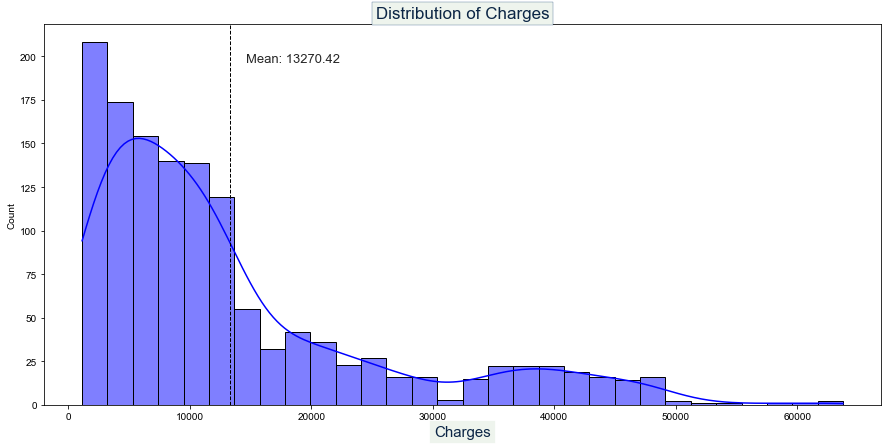

In [7]:
print('The minimum insurance cost is: $' + str(round((insurance.charges).min())))
print('The maximum insurance cost is: $' + str(round((insurance.charges).max())))
print('The median registered is: $' + str(round((insurance.charges).median())))
print('The mode registered is: $' + str(round(insurance.charges.mode()[0])))

f, ax, = plt.subplots(1,1, figsize=(15,7))
ax = sns.histplot(insurance['charges'], kde = True, color = 'b')
plt.style.use('seaborn')
plt.axvline(x=insurance.charges.mean(), color='black', linestyle='dashed', linewidth=1)
plt.xlabel('Charges', color='#0B2545', fontsize=15, backgroundcolor= '#EEF4ED')
plt.title('Distribution of Charges', color='#0B2545', fontsize=17, bbox=dict(facecolor=('#EEF4ED'),edgecolor=('#134074')))
min_ylim, max_ylim = plt.ylim()
plt.text(insurance.charges.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(insurance.charges.mean()), fontsize = 13)
plt.show()

*Figure 1 :  Right-skewed histogram, were charges ranges from \\$1.121,87 to \\$63.770,42. The mean or average of the cost a person is paying is \\$13.270,42 and indicated by the black vertical line overlaid on the histogram.* 

## Sex

In [8]:
#First I want to check male/female ratio.
genre_counts= insurance.sex.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print(genre_counts)

male      50.5%
female    49.5%
Name: sex, dtype: object


In [9]:
#Does the price of insurance change according to sex? Is this a factor to consider?
mean_by_sex = insurance.groupby('sex').mean().round(2).sort_values('charges',ascending = False)
print(mean_by_sex['charges'])

sex
male      13956.75
female    12569.58
Name: charges, dtype: float64


As we have previously demonstrated, there is a proportionate representation of men and women. When it comes to premiums and sex, the cost is impacted by this fact since males pay \$1.387,17 more for insurance than women.

The average age of the insured individuals is: 39.2
The minimum registered age is: 18
The maximum registered age is: 64


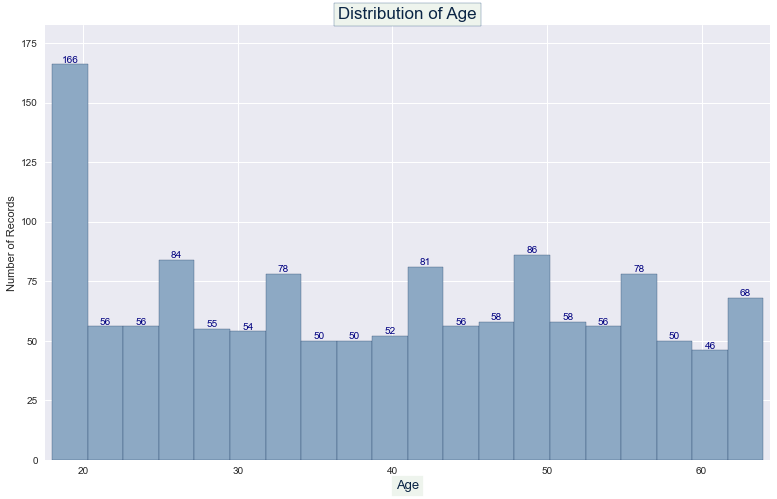

In [10]:
#Average age in the dataset. 
average_age = sum(insurance.age)/len(insurance.age)
print("The average age of the insured individuals is:", round(average_age,1))

#Minimum and maximum age.
print("The minimum registered age is:", min(insurance.age))
print("The maximum registered age is:", max(insurance.age))

plt.figure(figsize=(13, 8))
values, bins, bars = plt.hist(insurance['age'], bins=20, color ='#8da9c4', edgecolor='#13315C')
plt.style.use('seaborn')
plt.xlabel('Age', color='#0B2545', fontsize=13, backgroundcolor= '#EEF4ED')
plt.ylabel('Number of Records')
plt.title('Distribution of Age', color='#0B2545', fontsize=17, bbox=dict(facecolor=('#EEF4ED'),edgecolor=('#134074')))
plt.bar_label(bars, fontsize=10, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()

*Figure 2: The histogram for the age distribution ranging from 18 to 64 and it shows that 166 individuals, or the largest group, comprises young people between the ages of 18 and 20.*

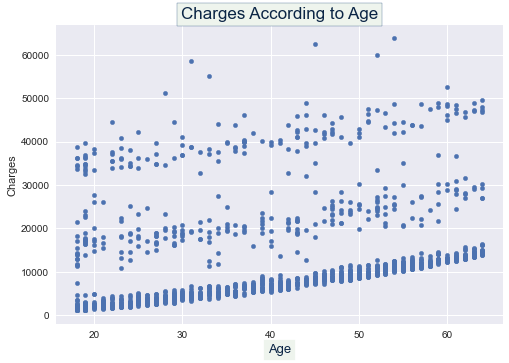

In [11]:
#Does the age of an individual changes the charge drastrically?
b = insurance.plot.scatter(y='charges', x='age', title='Charges vs Age')
plt.xlabel('Age', color='#0B2545', fontsize=13, backgroundcolor= '#EEF4ED')
plt.ylabel('Charges')
plt.title('Charges According to Age', color='#0B2545', fontsize=17, bbox=dict(facecolor=('#EEF4ED'),edgecolor=('#134074')))
plt.show()

*Figure 3: The evident charges-age correlation demonstrates that one of the major elements influencing insurance cost is age. The cost of insurance varies nonlinearly with age and the minimum insurance premium for elderly individuals is at least \\$10,000 higher than it is for younger individuals.*

## Smoker

In [12]:
#Creating list
smoker_status = []

#Function to load csv data into lists
def list_data(new_list, csv_file, col_name):   
    with open(csv_file, newline='') as csv_file_info:
        csv_dict = csv.DictReader(csv_file_info)
        for row in csv_dict:
            new_list.append(row[col_name])
        return new_list 

list_data(smoker_status, 'insurance.csv', 'smoker')
#print(smoker_status[:15]) to see if it works

is_a_smoker = 0
not_a_smoker = 0

for i in range(len(smoker_status)):
        if smoker_status[i] == 'yes':
            is_a_smoker += 1
        else: not_a_smoker += 1

print("The number of smokers is:", is_a_smoker)    
print("The number of non-smokers is:", not_a_smoker)  

The number of smokers is: 274
The number of non-smokers is: 1064


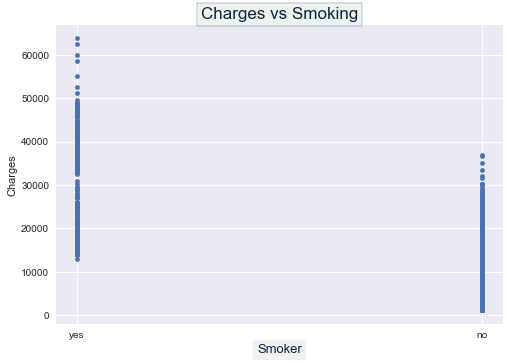

In [13]:
c = insurance.plot.scatter(y='charges', x='smoker')
plt.style.use('seaborn')
plt.xlabel('Smoker', color='#0B2545', fontsize=13, backgroundcolor= '#EEF4ED')
plt.ylabel('Charges')
plt.title('Charges vs Smoking', color='#0B2545', fontsize=17, bbox=dict(facecolor=('#EEF4ED'),edgecolor=('#134074')))
plt.show()

*Figure 4: In this scatter plot, it appears that people who do not smoke have in their favor a lower cost of insurance, suggesting that smokers will likely pay \\$11,000 more.*

In [14]:
#Difference in charges between smokers and non-smokers, is this a contributing factor?
mean_by_smoker = insurance.groupby('smoker').mean().round(2).sort_values('charges',ascending = False)
print(mean_by_smoker['charges'])

smoker
yes    32050.23
no      8434.27
Name: charges, dtype: float64


## Children

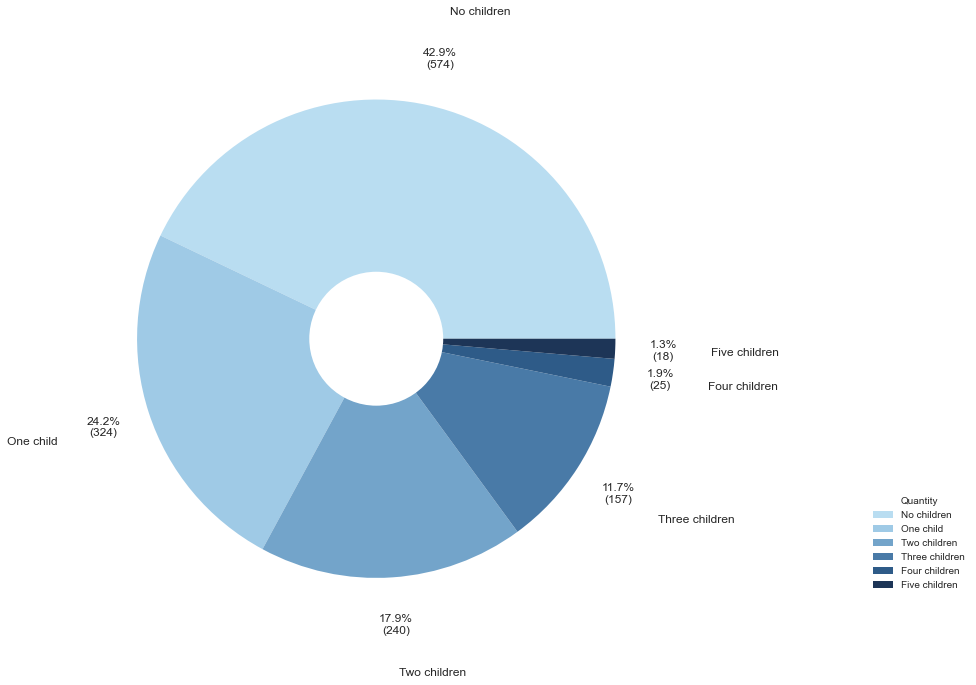

In [15]:
c_labels = ('No children','One child','Two children','Three children','Four children','Five children')
amount_children = insurance.groupby('children').size()
color = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7","#2E5B88","#1d3557"]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val) 
    return my_autopct

plt.pie(amount_children, labels=c_labels, colors = color, pctdistance = 1.2, labeldistance = 1.4, 
        autopct= make_autopct(values) , textprops={"family": "Arial", "size": 12}, radius = 2)
hole = plt.Circle((0, 0), 0.56, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.legend(loc="best", bbox_to_anchor=(2.5,0), title="Quantity")
plt.show()

*Figure 5: The largest group shown in this pie chart (42.9 percent) does not have children. Next, we'll examine what differentiates among those who have children and the sum of those who do not.*

In [16]:
#Variables for people with children and no children
has_kids = 0
no_kids = 0

for i in range(len(insurance.children)):
        if insurance.children[i] == 0:
            no_kids += 1
        else: has_kids += 1

print('Total number of people without children:', no_kids)    
print('Total number of people with children:', has_kids)  

Total number of people without children: 574
Total number of people with children: 764


In [17]:
#Initialize variables
cost_no_children = 0
cost_children = 0

for i in range(len(insurance.charges)):
    if insurance.children[i] == 0:
        cost_no_children += insurance.charges[i]
    else: cost_children += insurance.charges[i]

avg_no_children = round(cost_no_children/no_kids,2)
avg_has_children = round(cost_children/has_kids,2)   

print('The average insurance cost for an individual with no children: $' + str(avg_no_children))
print('The average insurance cost for an individual with children: $' + str(avg_has_children))
print('The difference in insurance cost between someone who has kids and someone who does not: $' 
      + str(round(avg_has_children - avg_no_children)))

The average insurance cost for an individual with no children: $12365.98
The average insurance cost for an individual with children: $13949.94
The difference in insurance cost between someone who has kids and someone who does not: $1584


## BMI

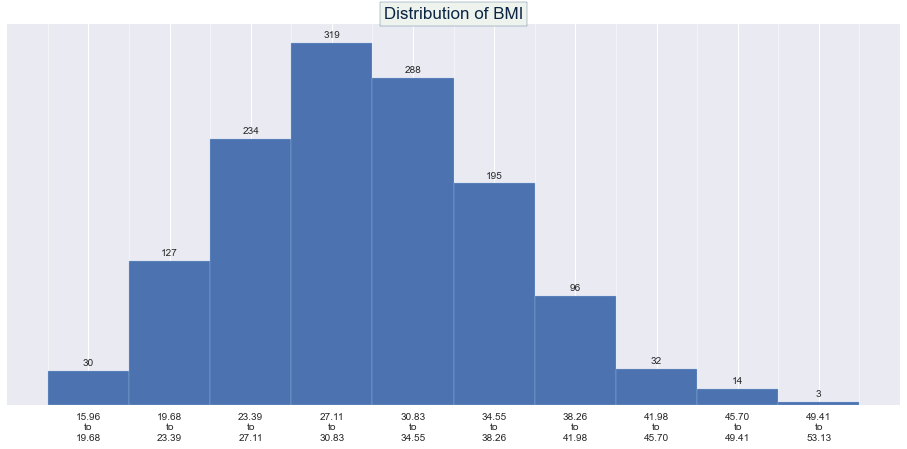

In [18]:
from matplotlib.ticker import AutoMinorLocator

fig, ax = plt.subplots(1, figsize=(16,7))
n, bins, patches = plt.hist(insurance.bmi, edgecolor='#9FCAE6')
# define minor ticks and draw a grid with them
minor_locator = AutoMinorLocator(2)
plt.gca().xaxis.set_minor_locator(minor_locator)
plt.grid(which='minor', color='white', lw = 0.5)
plt.style.use('seaborn')
# x ticks
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)
ax.tick_params(axis='x', which='both',length=0)
# remove y ticks
plt.yticks([])
# Hide the right and top spines
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# plot values on top of bars
for idx, value in enumerate(n):
    if value > 0:
        plt.text(xticks[idx], value+5, int(value), ha='center')
plt.title('Distribution of BMI', color='#0B2545', fontsize=17, bbox=dict(facecolor=('#EEF4ED'),edgecolor=('#134074')))
plt.show()

*Figure 6: The BMI distribution is almost symmetrical and the distribution is slightly skewed to the right. There are also few outliers with BMI > 50. The following ranges must be taken into consideration:*
 - Underweight: <18,3
 - Normal: 18,5-24,9
 - Overweight: 25-29,9
 - Obese: 30-34,9
 - Extremely Obese: 35<

*In addition to the fact that the group that integrates the largest number of people falls into the overweight and obese category.*

The minimum BMI value is:  15.96
The maximum BMI value is:  53.13


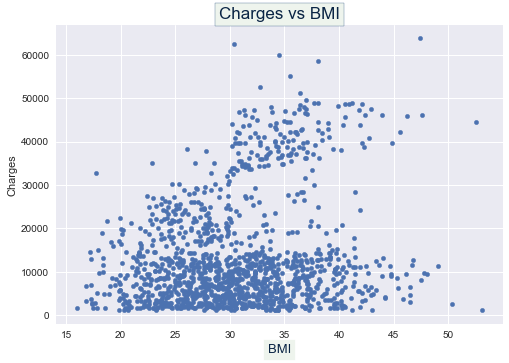

In [19]:
print('The minimum BMI value is: ', insurance.bmi.min())
print('The maximum BMI value is: ',insurance.bmi.max())

d = insurance.plot.scatter(y='charges', x='bmi')
plt.style.use('seaborn')
plt.xlabel('BMI', color='#0B2545', fontsize=13, backgroundcolor= '#EEF4ED')
plt.ylabel('Charges')
plt.title('Charges vs BMI', color='#0B2545', fontsize=17, bbox=dict(facecolor=('#EEF4ED'),edgecolor=('#134074')))
plt.show()

*Figure 7: There is clearly no discernible correlation, as shown by the scatter plot in which the 'BMI' is the independent variable and the 'Insurance Cost' is the dependent variable. While those who are underweight could spend less, the majority of individuals in all bmi classifications pay under \\$10.000.*

## Region

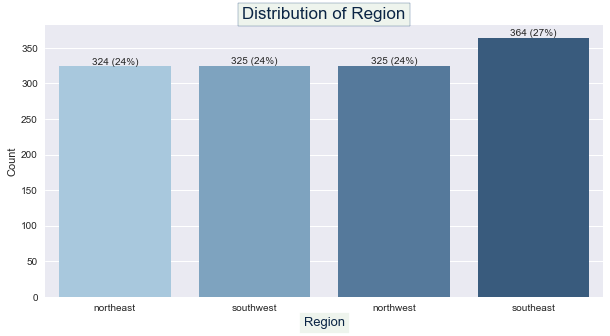

In [20]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x=insurance['region'], order=insurance['region'].value_counts(ascending=True).index, 
                   palette=['#9FCAE6', '#73A4CA', '#497AA7', '#2E5B88']);
abs_values = insurance['region'].value_counts(ascending=True)
rel_values = insurance['region'].value_counts(ascending=True, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.style.use('seaborn')
plt.xlabel('Region', color='#0B2545', fontsize=13, backgroundcolor= '#EEF4ED')
plt.ylabel('Count')
plt.title('Distribution of Region', color='#0B2545', fontsize=17, bbox=dict(facecolor=('#EEF4ED'),edgecolor=('#134074')))
plt.show()

*Figure 8: In this countplot I implemented a regional analysis that included categorical variables representing different regions in this model. This allows for a comparison of insurance costs between regions later on.*


In [21]:
mean_by_region = insurance.groupby('region').mean().round(2).sort_values('charges',ascending = False)
print(mean_by_region['charges'])

region
southeast    14735.41
northeast    13406.38
northwest    12417.58
southwest    12346.94
Name: charges, dtype: float64


Southwest and Northwest pay the least for premiums, and the average cost difference equals \\$70.64. The Southeast is the most costly region, with a \\$1.329,03 price difference between it and the Northeast. It is clear that the location influences the cost of insurance. It costs \\$2.389 more to live in the region that pays the least (Southwest) than it does in the region that pays the most (Southeast).

## Conclusion

    It is clear that smoking and possessing a high BMI have a big impact on how much insurance prices vary in the USA. These factors are taken into consideration by insurance companies since they raise the potential of medical expenses and health risks. Although characteristics such as age, sex, location, and the quantity of children all affect insurance costs, people cannot readily modify such factors. A habit of smoking and a high BMI have a negative impact on insurance premiums, but people can modify their lifestyles for a better outcome.
    
    Quitting smoking is an essential first step for anyone looking for lower insurance premiums. Smoking has an impact on your general health and raises your risk of contracting a number of health conditions, which will raise your medical costs. People can improve their health, minimize their risk of developing chronic diseases, and potentially lower their insurance costs by giving up smoking.

    Maintaining a healthy weight is essential for lowering insurance premiums. Heart disease, diabetes, and hypertension are just a few of the health issues that are linked to a high BMI and can all result in higher medical costs. People can acquire and maintain a healthy weight by exercising frequently, eating a balanced diet, and getting professional advice.
    
    Taking proactive steps today can lead to a healthier and more affordable future.